In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid") # set the style of plots >> dark with grids

In [2]:
#import dataset
heartData = pd.read_csv('heart.csv')
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Functions

In [3]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Number of records missing', 'Percentage of missing records'])
    return missing_values

In [4]:
def basicEDAhistboxviolin(varNum, plotNum, dataframe):
    
    f, axes = plt.subplots(varNum, plotNum, figsize=(18, 24))

    count = 0
    for var in dataframe:
        if var != 'HeartDisease':
        
            sns.boxplot(data = dataframe[var], orient = "h", color="cyan", ax = axes[count,0])
            sns.histplot(data = dataframe[var], kde=True, color="pink", ax = axes[count,1])
            sns.violinplot(data = dataframe[var], orient = "h",color="gold", ax = axes[count,2])

            count += 1

# basicEDAhistboxviolin(5, 3, numericalHeartData)

In [5]:
def basicEDAcatplot(dataframe):
    
    
    for var in dataframe:
        if var!= 'HeartDisease':
            sns.catplot(y = var, data = dataframe, kind = "count", height=2, aspect=2)
        
# basicEDAcatplot(categoricalHeartData)

In [6]:
def bivariateCategorical(dataframe):
    index=1
    plt.figure(figsize=(14, 18)) 

    for var in dataframe:
         # Adjust the figure size as needed
        plt.subplot(3,2,index)
        index+= 1
        plt.xlabel('Heart Disease')
        plt.ylabel(var)
       
        sns.heatmap(heartData.groupby([dataframe[var], 'HeartDisease']).size().unstack(), 
        linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "rocket")

In [7]:
def bivariateNumerical(col, row, dataframe):
    index = 0
    plt.figure(figsize=(18,24))
    for var in dataframe:
        if var != "HeartDisease":
            index += 1
            plt.subplot(col, row, index)
            sns.boxplot(x=heartData['HeartDisease'], y=var, data=dataframe)
    

In [8]:
def bivariateNumericalHistogram(col, row, dataFrame):
    plt.figure(figsize=(18,18))
    index = 0
    for var in dataFrame:
        if var != "HeartDisease":
            index += 1
            plt.subplot(col,row,index)
            plt.style.use('seaborn')
            plt.tight_layout()
            sns.set_context('talk')
            sns.histplot(data=dataFrame, x=var, hue="HeartDisease",multiple="stack",palette='magma')
            
    

In [9]:
def outlierRemove(dataframe, column):
    # Convert the column to numeric, coercing errors to NaN
    dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

    # Calculate upper and lower whiskers
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr

    # Replace outliers with np.nan
    dataframe.loc[dataframe[column] > upper_whisker, column] = np.nan
    dataframe.loc[dataframe[column] < lower_whisker, column] = np.nan

# Cleaning

### Removing Outliers

In [10]:
outlierRemove(heartData, "Cholesterol")
outlierRemove(heartData, "Age")
outlierRemove(heartData, "RestingBP")
outlierRemove(heartData, "MaxHR")
outlierRemove(heartData, "Oldpeak")

### Checking for Duplicates

In [11]:
heartData.duplicated().value_counts()

False    918
Name: count, dtype: int64

### Removing Missing Values

In [12]:
missing(heartData)

,Number of records missing,Percentage of missing records
Cholesterol,183,0.199346
RestingBP,28,0.030501
Oldpeak,16,0.017429
MaxHR,2,0.002179
Age,0,0.000000
Sex,0,0.000000
ChestPainType,0,0.000000
FastingBS,0,0.000000
RestingECG,0,0.000000
ExerciseAngina,0,0.000000


In [13]:
heartData.dropna(inplace=True)

In [14]:
missing(heartData)

,Number of records missing,Percentage of missing records
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


# EDA

In [15]:
print("There are", heartData.shape[0], "observations and", heartData.shape[1], "fields in the dataset")


There are 702 observations and 12 fields in the dataset


There are `12` fields and `702` observations <br>
The response variable is `HeartDisease` and the rest seem to be predictors<br>
There are `6` categorical data out of which `HeartDisease` and `FastingBS` are numeric<br>
There are `4` numeric variables<br>
There seems to be no null entries so far (need to check again)

In [16]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    float64
 1   Sex             702 non-null    object 
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    float64
 4   Cholesterol     702 non-null    float64
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    float64
 8   ExerciseAngina  702 non-null    object 
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 71.3+ KB


In [17]:
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,52.722222,131.556980,239.709402,0.162393,140.549858,0.830912,0.462963
std,9.535341,15.420368,50.684118,0.369074,24.360985,0.959731,0.498982
min,28.000000,92.000000,85.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,140.000000,0.400000,0.000000
75%,59.000000,140.000000,272.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,170.000000,404.000000,1.000000,202.000000,3.600000,1.000000


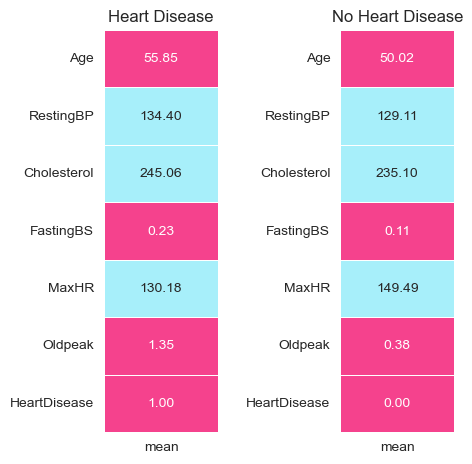

In [18]:
yes = heartData[heartData['HeartDisease'] == 1].describe().T
no = heartData[heartData['HeartDisease'] == 0].describe().T
colors = ['#f5428d','#a7effa']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

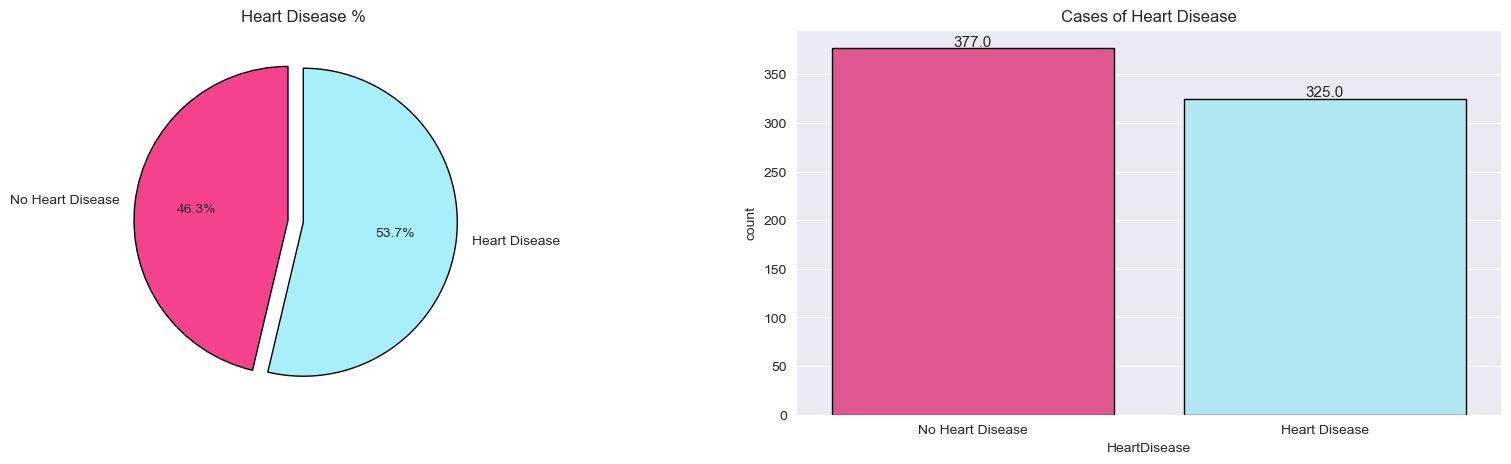

In [19]:
l = list(heartData['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x="HeartDisease",data=heartData, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

Seperating Dataset into numeric and categorical data 

In [20]:
numericalHeartData = pd.DataFrame(heartData[['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR', 'HeartDisease']])
categoricalHeartData = pd.DataFrame(heartData[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# Univariate Data Analysis

### Univariate Numeric Data Analysis

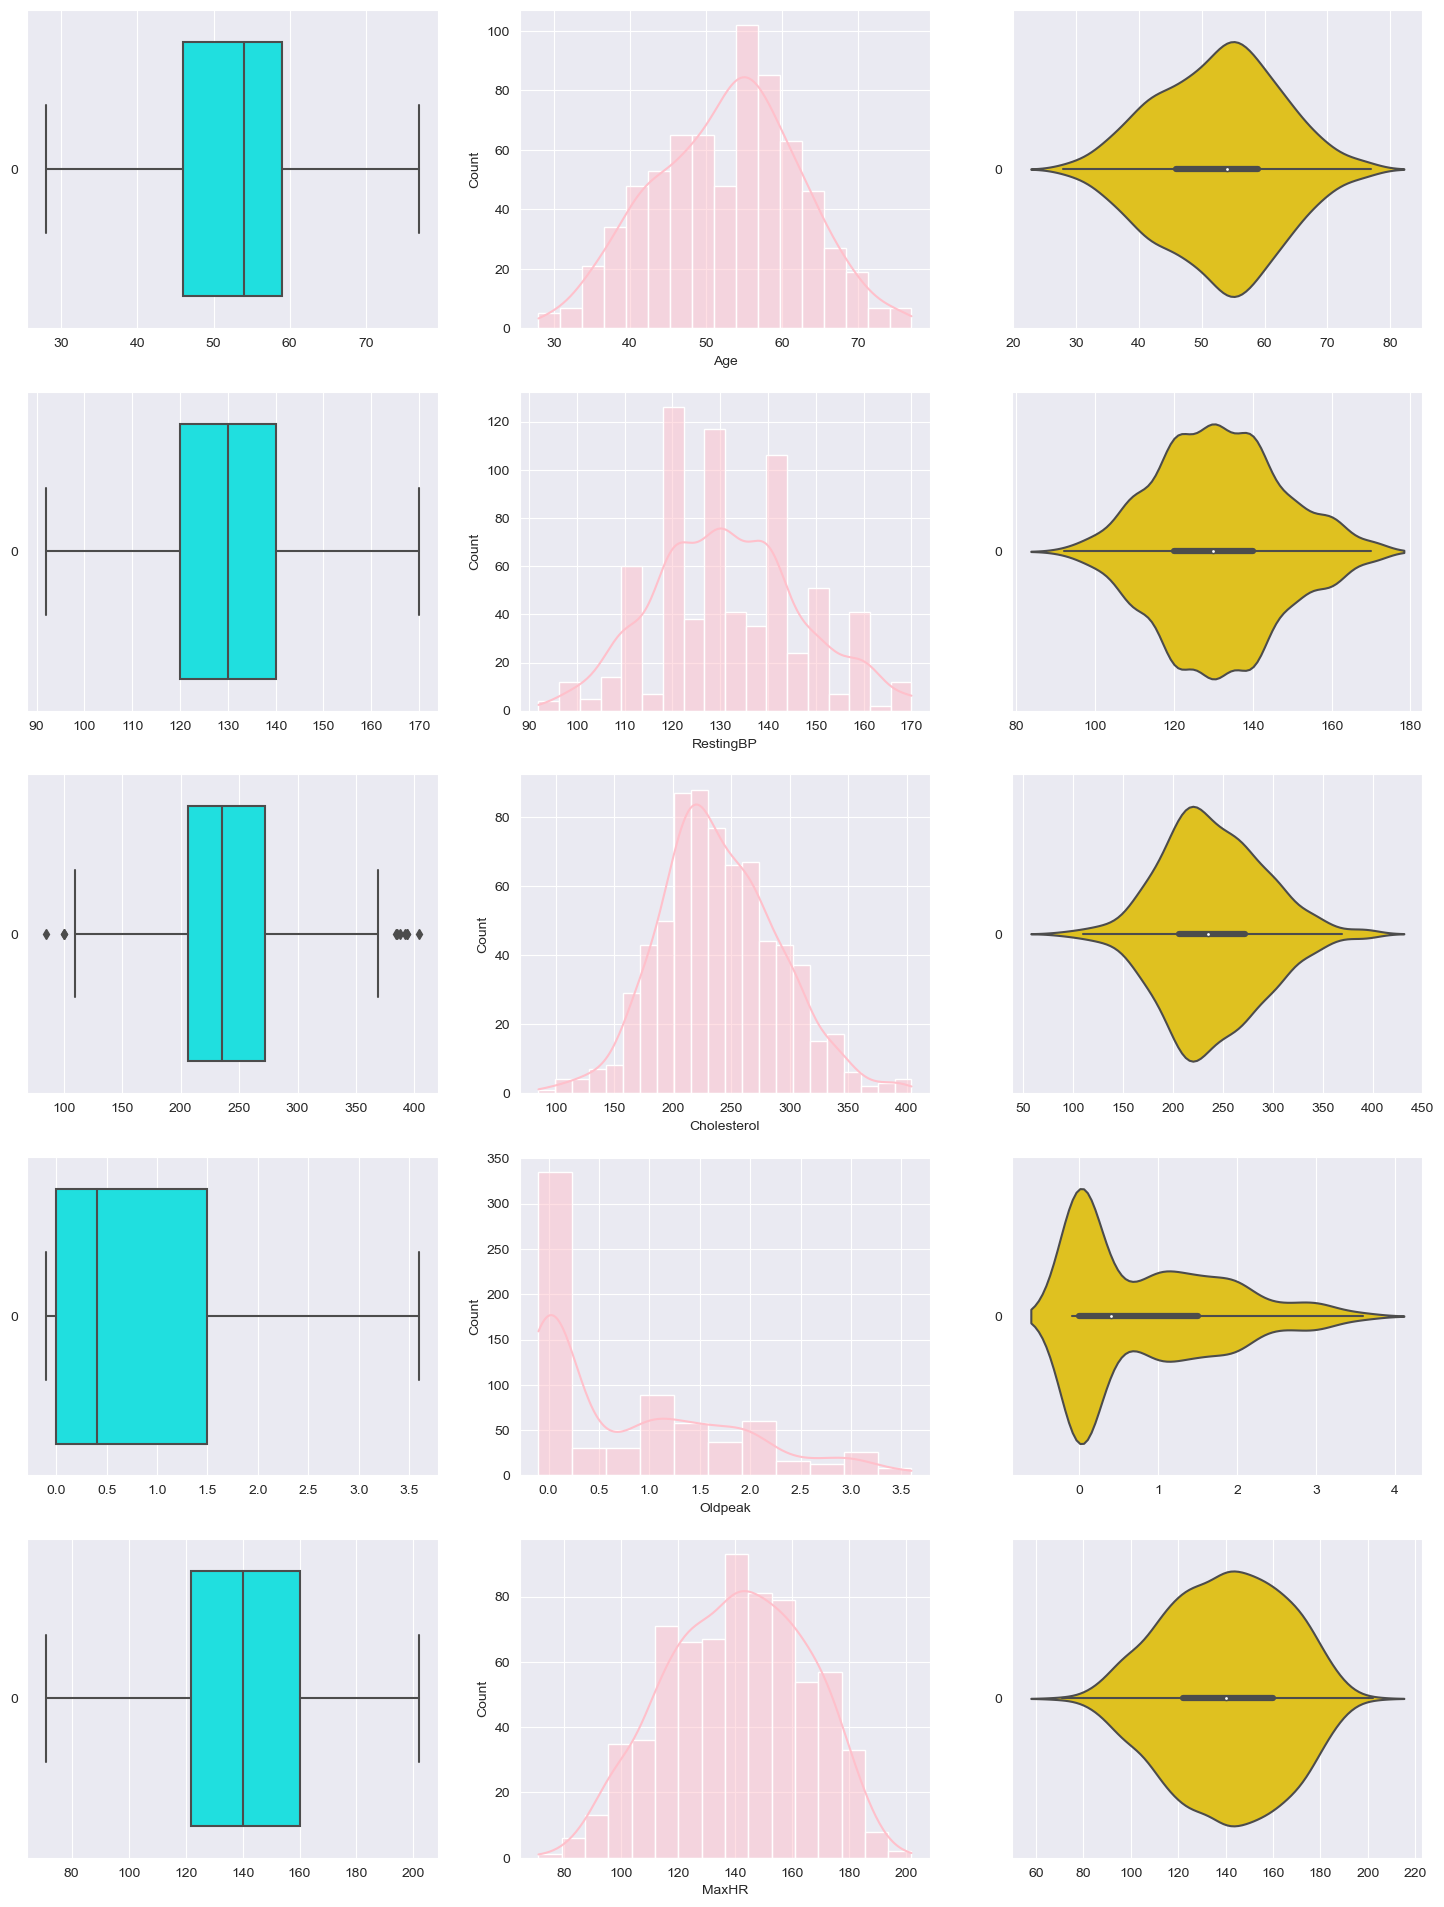

In [21]:
basicEDAhistboxviolin(5, 3, numericalHeartData)

### Univariate Categorical Data Analysis

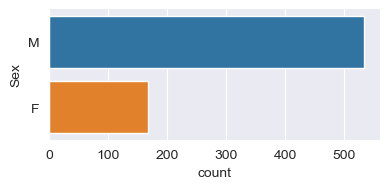

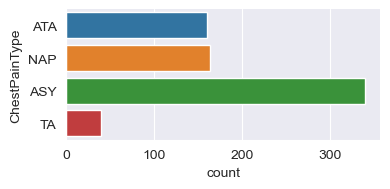

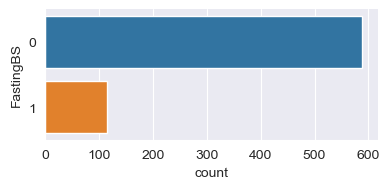

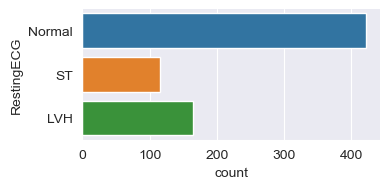

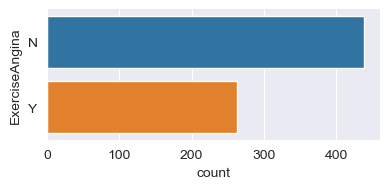

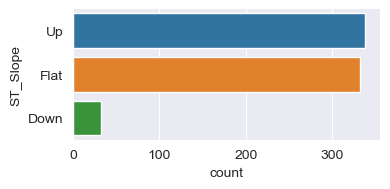

In [22]:
basicEDAcatplot(categoricalHeartData)

# Bi-variate Data Analysis

### Numerical Analysis vs. Heart Disease

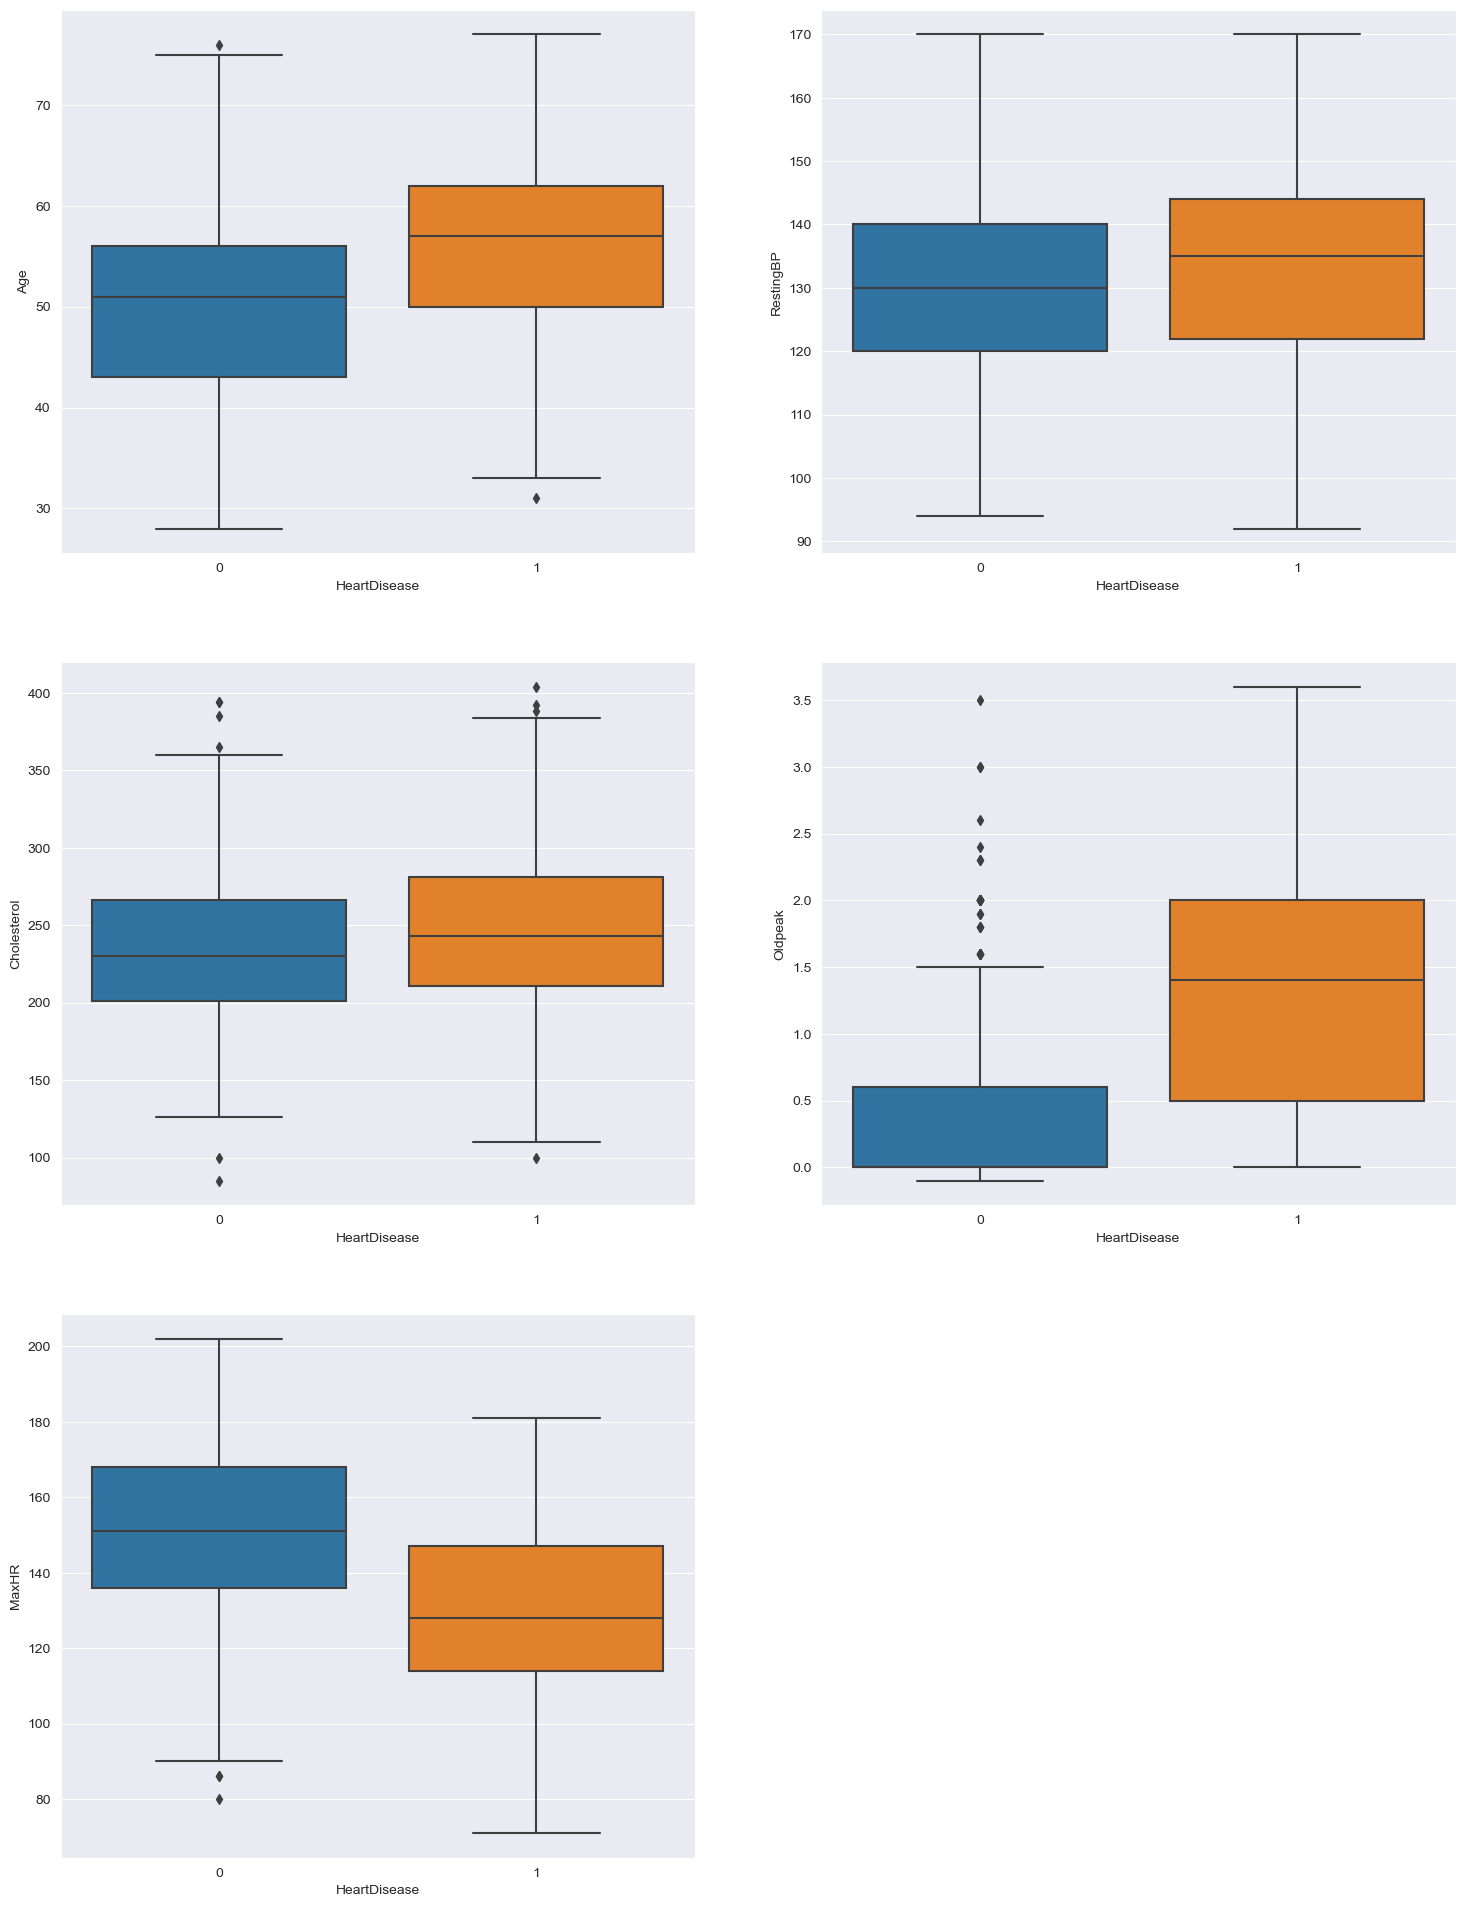

In [23]:
bivariateNumerical(3, 2, numericalHeartData)

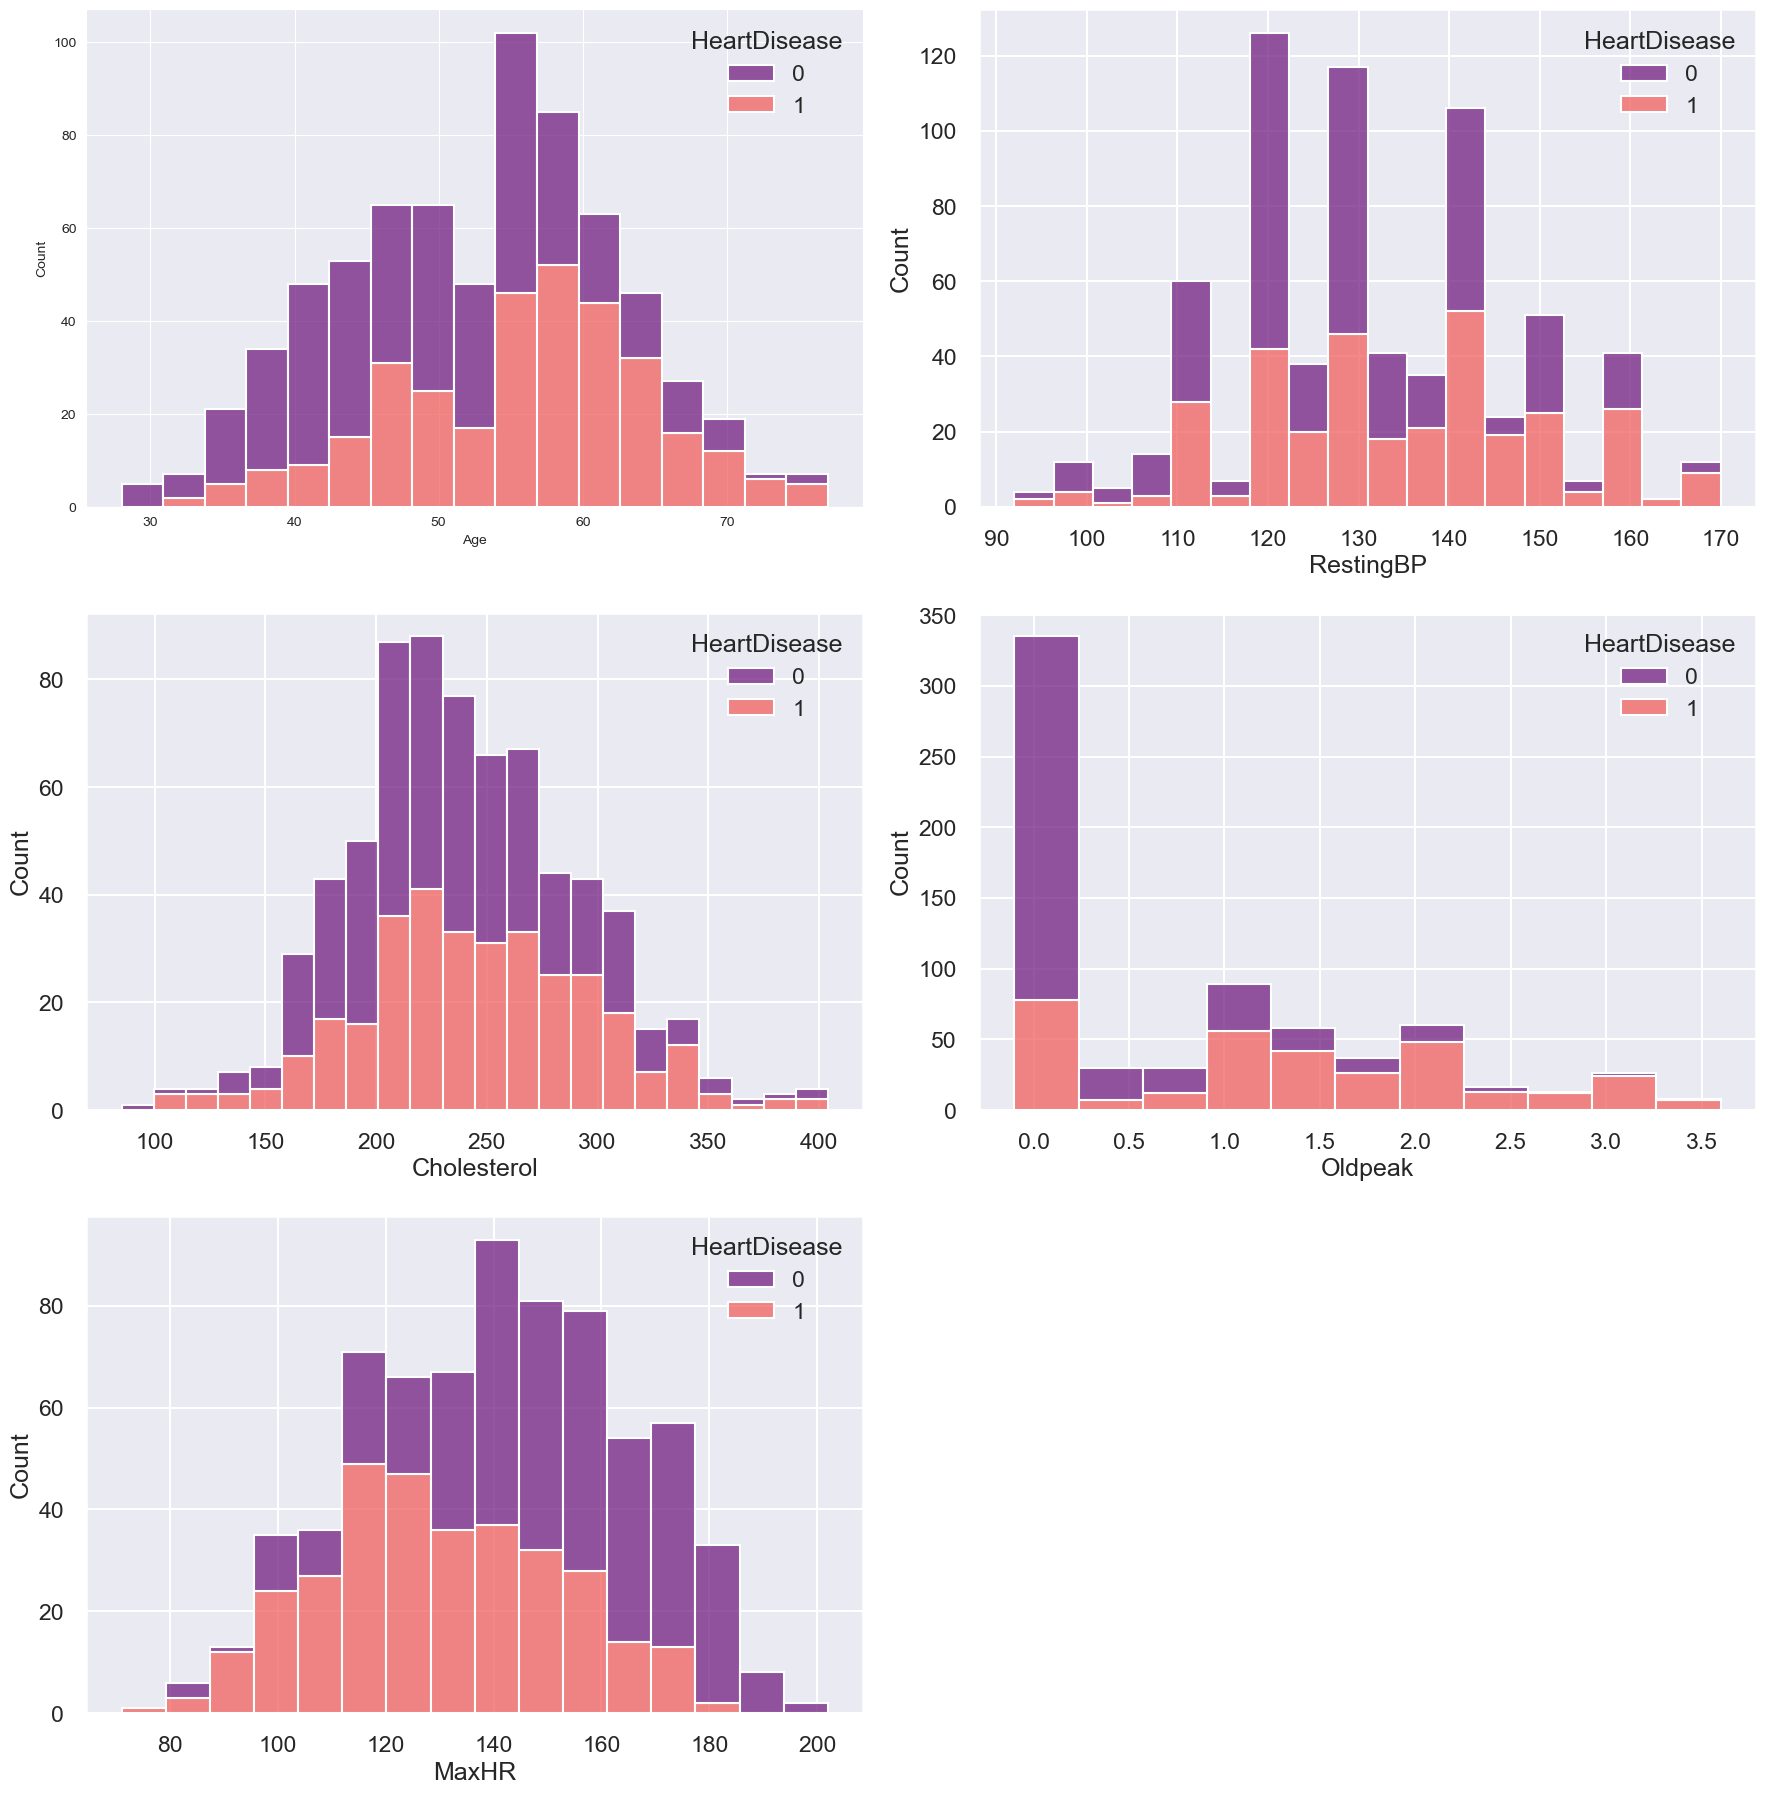

In [24]:
bivariateNumericalHistogram(3, 2, numericalHeartData)

### Categorical Analsysis vs. Heart Disease

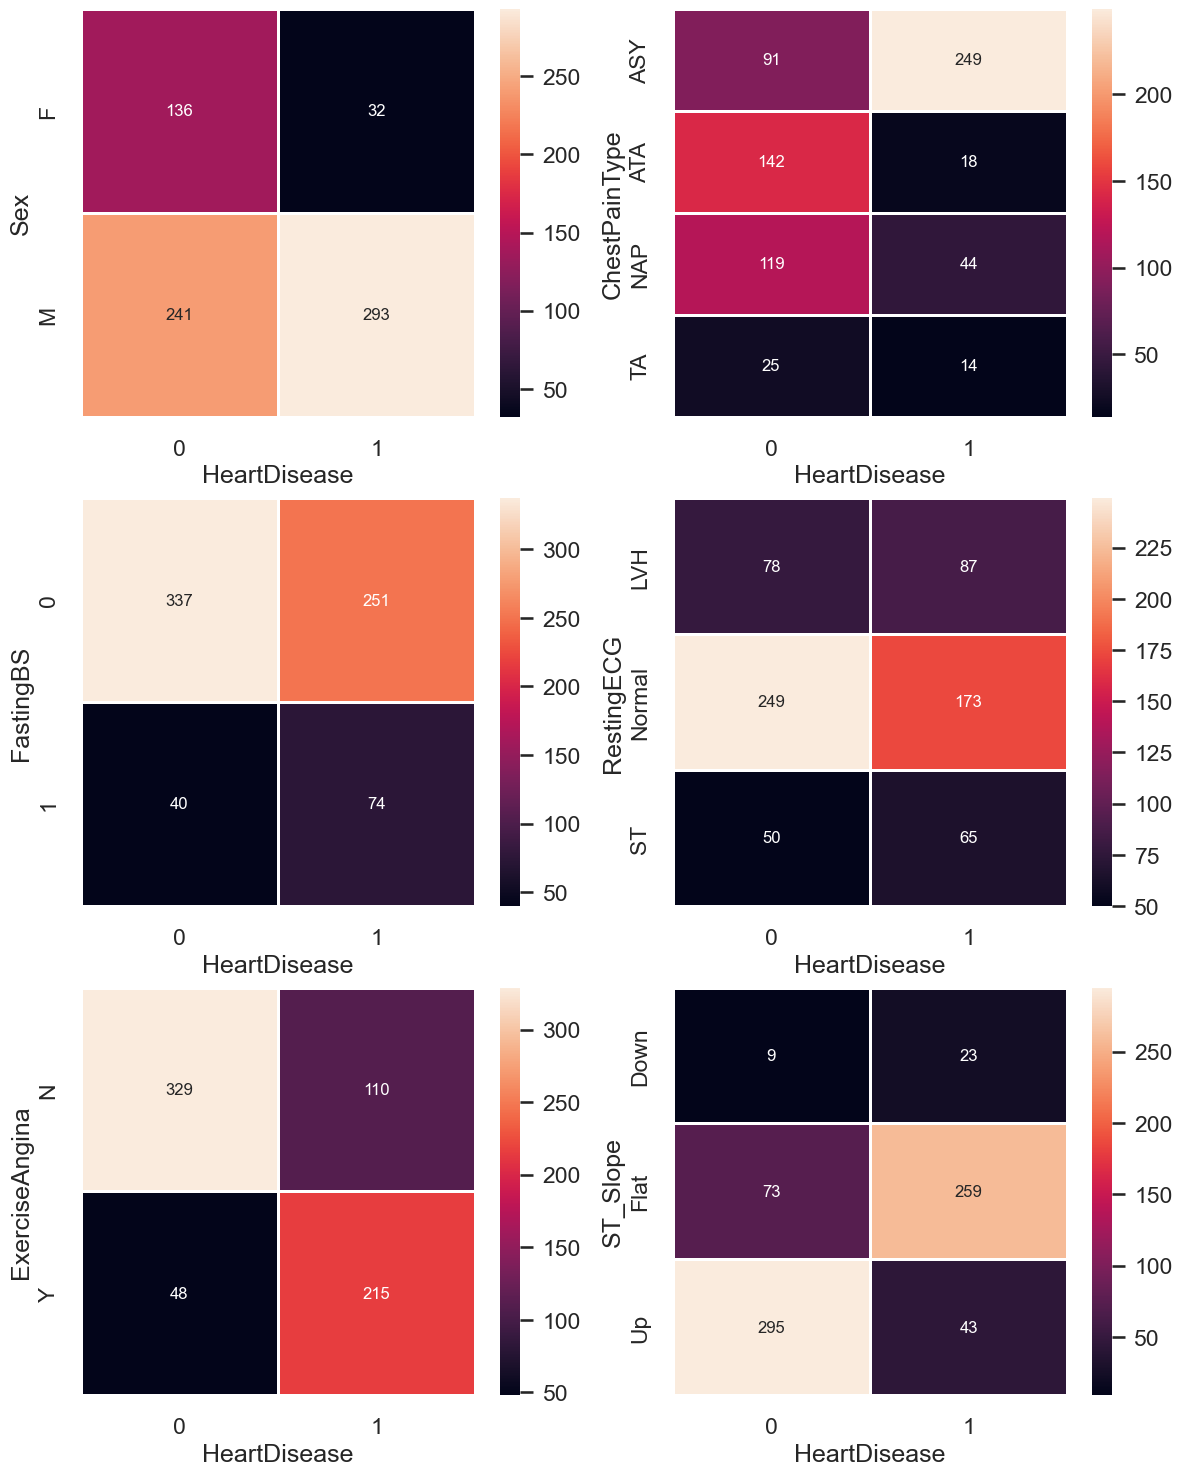

In [25]:
bivariateCategorical(categoricalHeartData)

# Multi-Variate Analysis

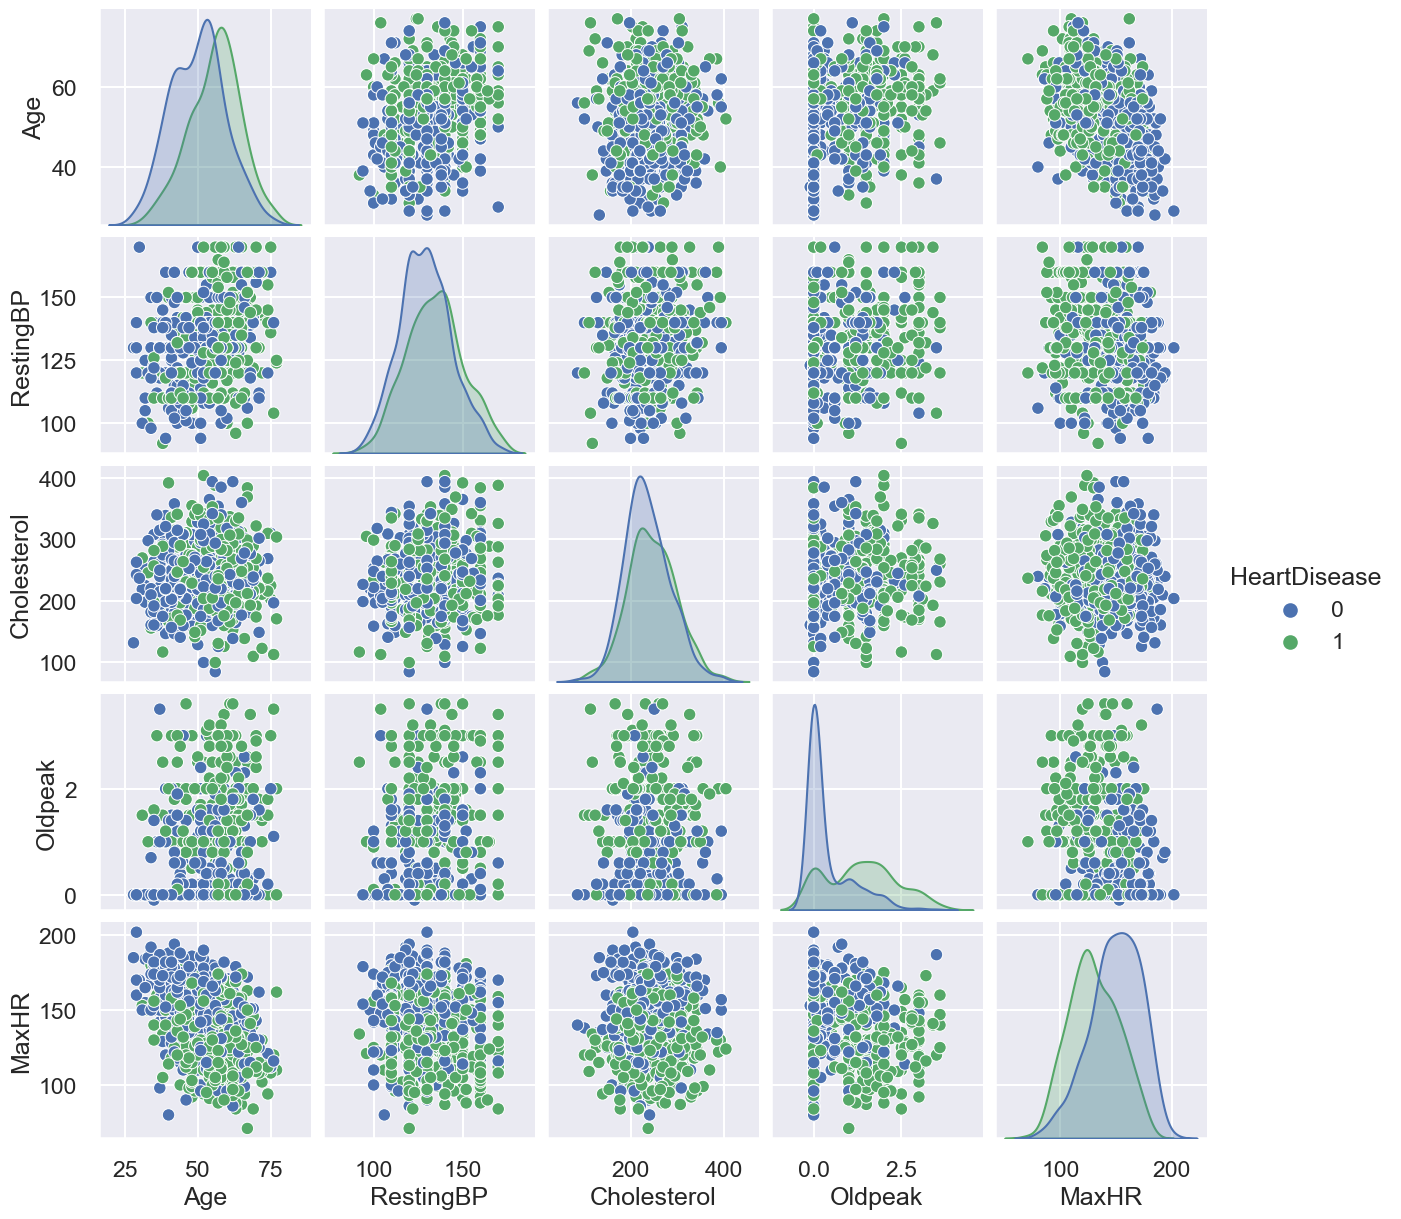

In [26]:
sns.pairplot(numericalHeartData,hue='HeartDisease')

In [27]:
numericalHeartData.corr()

,Age,RestingBP,Cholesterol,Oldpeak,MaxHR,HeartDisease
Age,1.000000,0.270860,0.069529,0.283476,-0.402700,0.305000
RestingBP,0.270860,1.000000,0.089587,0.191743,-0.128768,0.171118
Cholesterol,0.069529,0.089587,1.000000,0.071706,-0.002240,0.098115
Oldpeak,0.283476,0.191743,0.071706,1.000000,-0.280452,0.502095
MaxHR,-0.402700,-0.128768,-0.002240,-0.280452,1.000000,-0.395452
HeartDisease,0.305000,0.171118,0.098115,0.502095,-0.395452,1.000000


In [28]:
heartDatabyGender= heartData.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
heartDatabyGender

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,51.630952,168,129.50000,248.035714,16,168,147.220238,168,0.572619,168,32
M,53.065543,534,132.20412,237.089888,98,534,138.451311,534,0.912172,534,293


<Axes: >

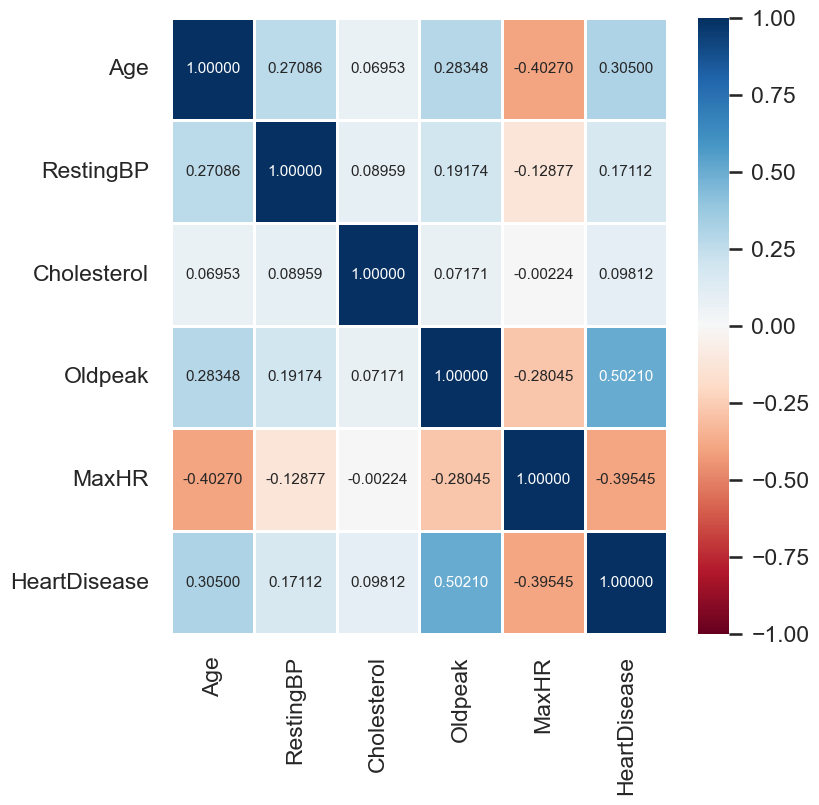

In [29]:
f = plt.figure(figsize=(8, 8))
sns.heatmap(numericalHeartData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".5f", annot_kws = {"size": 11}, cmap = "RdBu")

Interesting details noticed
* highest correlation is with HeartDisease and OldPeak
* second highest correlation is with HeartDisease and Age
* highest negative correlation is with Age and MaxHR
* second highest negative correlation is with Heart Disease and MxHR